# Exploratory Data Analysis

This notebook is dedicated to the EDA(Exploratory Data Analysis) on the Car Ads dataset. This is done as a practice so please don't expect much to learn much from this notebook.High expectation might result in high frustation. 

In [0]:

# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore")
%matplotlib inline


## Load Data

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [6]:
df = pd.read_csv('/content/drive/My Drive/AI Training/car.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,stk_year,transmission,door_count,seat_count,fuel_type,date_created,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2738.71


This is a car Ads dataset. Just see the number of rows and columns in the dataset and realise the amount of RAM you may need.



In [19]:
df.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'stk_year', 'transmission', 'door_count', 'seat_count',
       'fuel_type', 'date_created', 'price_eur'],
      dtype='object')

In [20]:
df.info() ## Just for information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   stk_year             object 
 7   transmission         object 
 8   door_count           object 
 9   seat_count           object 
 10  fuel_type            object 
 11  date_created         object 
 12  price_eur            float64
dtypes: float64(5), object(8)
memory usage: 352.4+ MB


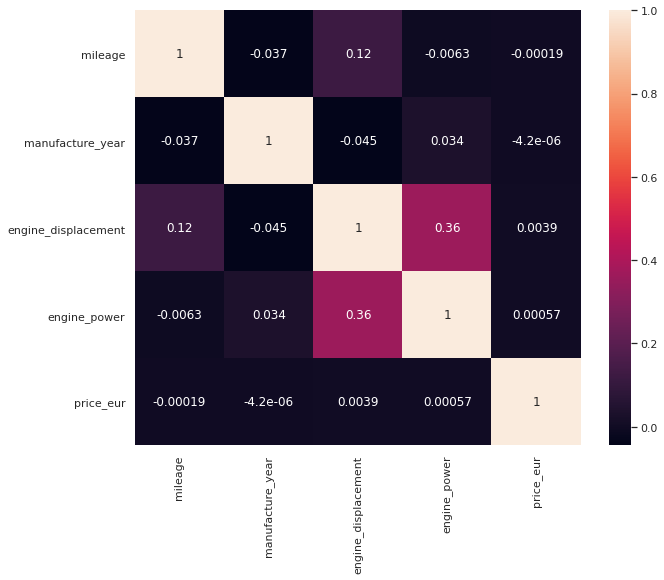

In [21]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr(), annot = True)

Here, correlation plot is shown only for the numeric columns. This is just for the visualisation not for any kinds of interpretation. Later we will see correlation plot with different objective.

### Missing Data Handling

In [22]:
df.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
price_eur                    0
dtype: int64

Here, we can see that there are lots of missing values for almost all variables.  Deletion technique to handle the missing values is infeasible here since we can lose almost all the rows if we do so. So let's try out other techniques.

In [23]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
date_created,date_created,0.000000
price_eur,price_eur,0.000000
mileage,mileage,10.205263
manufacture_year,manufacture_year,10.430261
maker,maker,14.605343
engine_power,engine_power,15.617527
door_count,door_count,17.292097
transmission,transmission,20.873863
engine_displacement,engine_displacement,20.924076
seat_count,seat_count,21.095062


In [0]:
df.drop(['color_slug','body_type', 'date_last_seen'], axis = 1, inplace = True)

These columns are dropped since, they have almost 0 correlation with the output variable.

In [26]:
df.describe(include ='O')

,maker,model,stk_year,transmission,door_count,seat_count,fuel_type,date_created
count,3033997,2419551,1844756,2811282,2938539.0,2803423.0,1705306,3552912
unique,46,1012,298,2,26.0,88.0,5,3552912
top,skoda,octavia,None,man,5.0,5.0,gasoline,2016-10-08 19:21:00.56613+00
freq,313830,129563,1308651,2021990,777522.0,1084557.0,902222,1


In [27]:
df.fuel_type.unique()

array(['diesel', 'gasoline', nan, 'lpg', 'cng', 'electric'], dtype=object)

In [28]:
df.transmission.unique()

array(['man', 'auto', nan], dtype=object)

In [29]:
pd.crosstab(index = df['fuel_type'], columns=df['transmission'])

transmission,auto,man
fuel_type,,
cng,114,685
diesel,220405,422153
electric,5784,4449
gasoline,141860,480686
lpg,1018,2351


Here, we can see the relation between two columns i.e., transmission and fuel_type. We can use this knowledge to handle the missing data.

In [0]:
def my_func(row):
  ##conditions
  pass
  

In [0]:
# df['transmission'] = df.apply(lambda row: my_func(row) if pd.isnull(row['transmission']) else row, axis=1)

Here, lambda function was used to fill the null values based on the multivariate analysis as shown in teh above cells but due to large data size, RAM didn't support so other techniques are used.

In [0]:
df['maker'].fillna(df['maker'].mode()[0], inplace=True) 

Let us fill the null value in the column of `manufacture_year`, `mileage` with respective mean values grouped by `maker`.

In [0]:
df["manufacture_year"] = df.groupby("maker")['manufacture_year'].transform(lambda x: x.fillna(x.mean()))
df["mileage"] = df.groupby("maker")['mileage'].transform(lambda x: x.fillna(x.mean()))

In [0]:
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True) 
df['door_count'].fillna(df['door_count'].mode()[0], inplace=True) 
df['seat_count'].fillna(df['seat_count'].mode()[0], inplace=True) 


df['engine_displacement'].fillna(float(int(df['engine_displacement'].mean())), inplace=True)

In [35]:
df.fillna(axis = 0, method ='ffill', inplace = True)
df.isnull().sum()

maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
stk_year               0
transmission           0
door_count             0
seat_count             0
fuel_type              0
date_created           0
price_eur              0
dtype: int64

Now, we don't have missing values.

In [0]:
column_names = df.columns

## Univariate Analysis

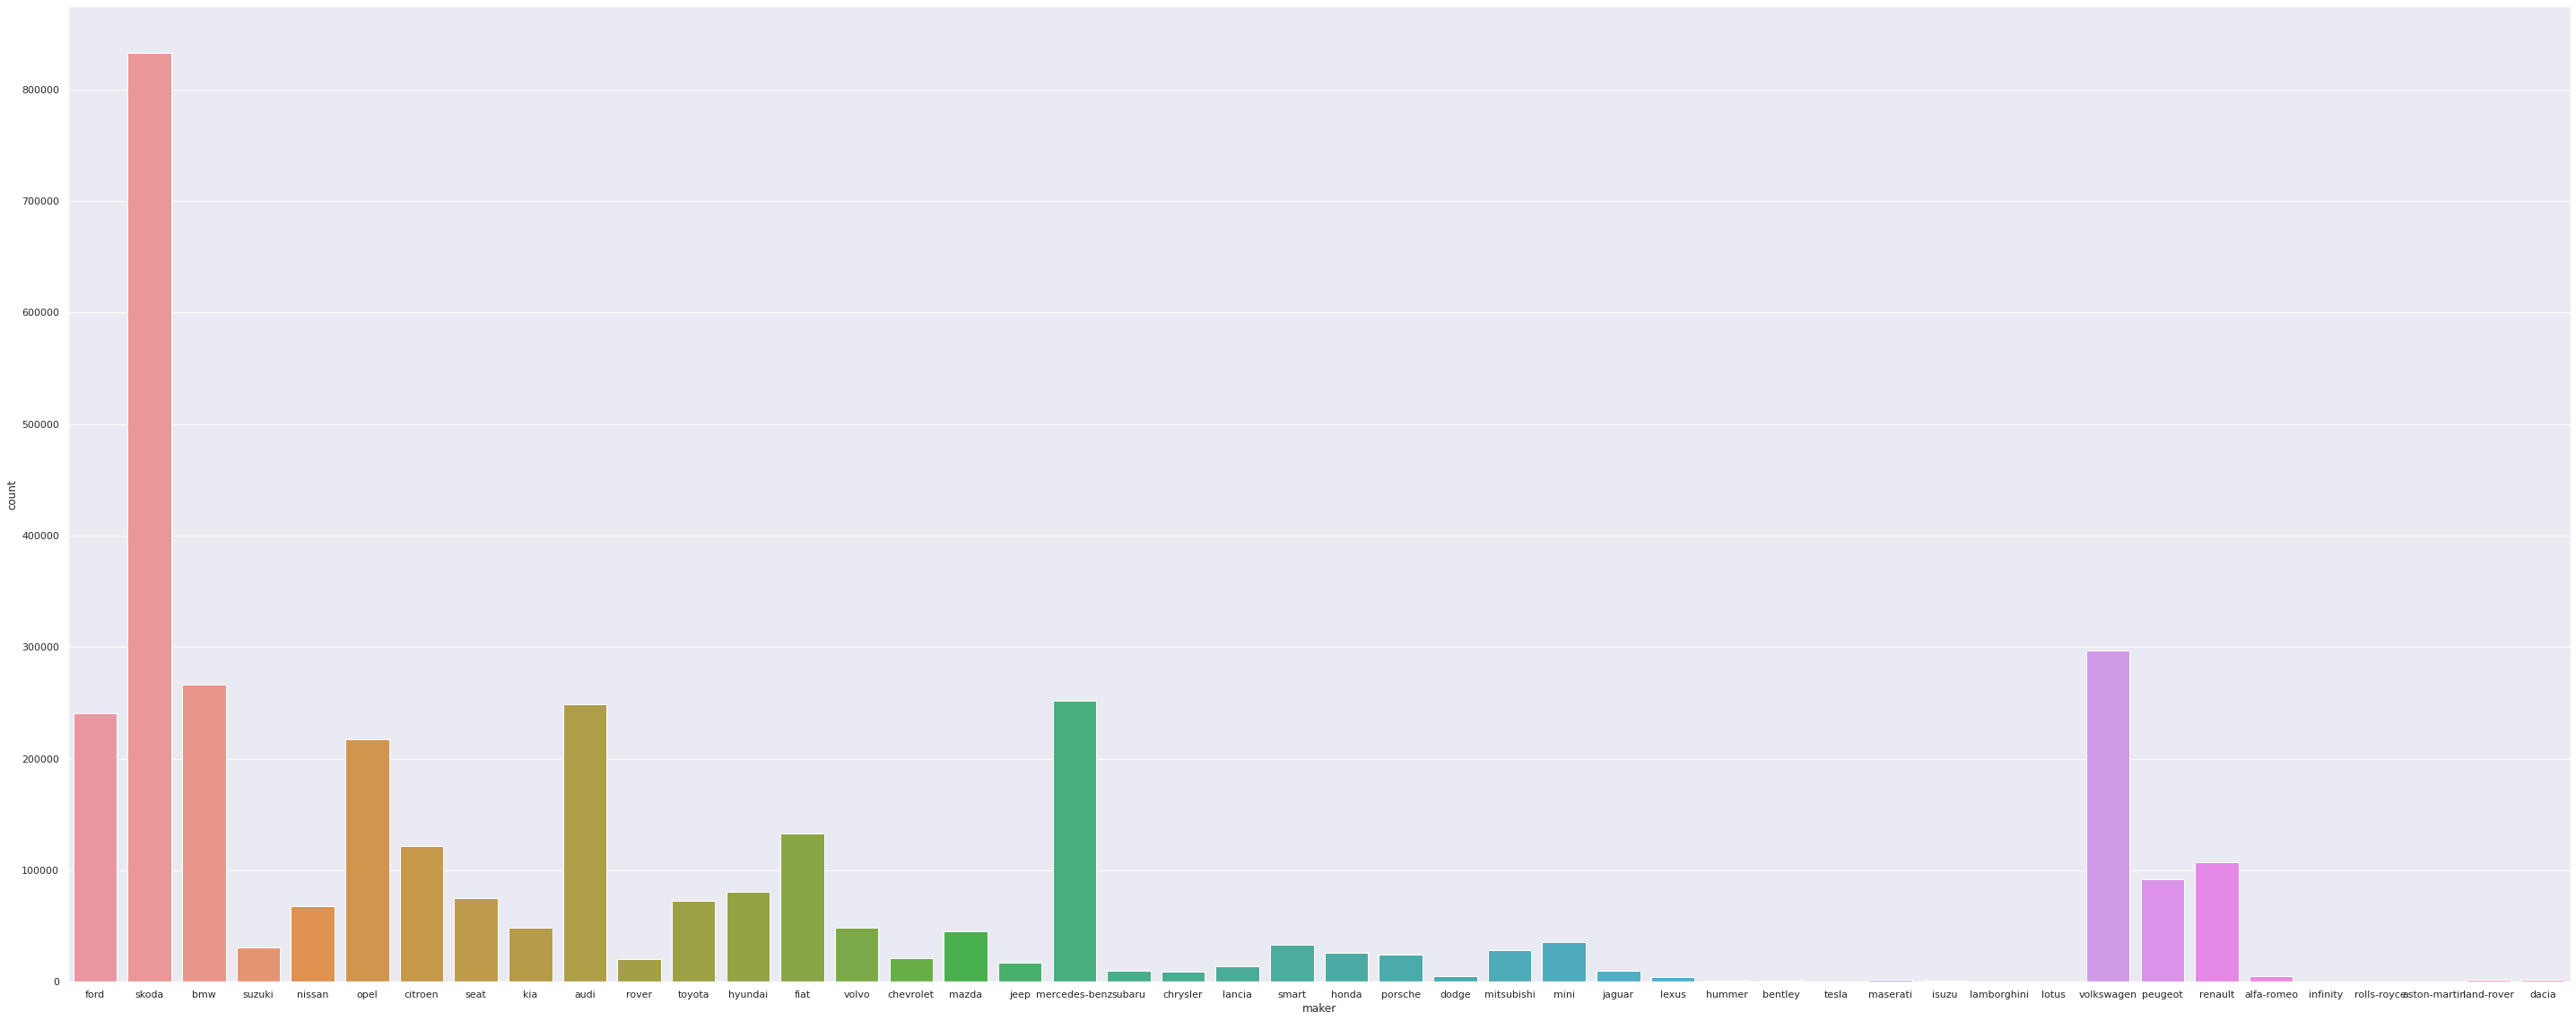

In [37]:
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot(x = 'maker', data = df)

## Bivariate Analysis



In [38]:
df.describe(include ='O')

,maker,model,stk_year,transmission,door_count,seat_count,fuel_type,date_created
count,3552912,3552912,3552912,3552912,3552912.0,3552912.0,3552912,3552912
unique,46,1012,298,2,26.0,88.0,5,3552912
top,skoda,octavia,None,man,5.0,5.0,diesel,2016-10-08 19:21:00.56613+00
freq,832745,169235,1308652,2763620,1391895.0,1834046.0,2474568,1


In [39]:
df.fuel_type.unique()

array(['diesel', 'gasoline', 'lpg', 'cng', 'electric'], dtype=object)

In [40]:
pd.crosstab(index = df['fuel_type'], columns=df['transmission'])

transmission,auto,man
fuel_type,,
cng,206,1908
diesel,623032,1851536
electric,10723,61060
gasoline,153233,833881
lpg,2098,15235




























### Encoding Categorical data

In [0]:
## RAM is not supported for One hot encoding so we will use label encoding

In [0]:
df.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
stk_year                object
transmission            object
door_count              object
seat_count              object
fuel_type               object
date_created            object
price_eur              float64
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['maker', 'model', 'stk_year', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'date_created'],
      dtype='object')


In [0]:
le = LabelEncoder()
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                int64  
 1   model                int64  
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   stk_year             int64  
 7   transmission         int64  
 8   door_count           int64  
 9   seat_count           int64  
 10  fuel_type            int64  
 11  date_created         int64  
 12  price_eur            float64
dtypes: float64(5), int64(8)
memory usage: 352.4 MB
None


Since, Label encoding introduces the diadvantage regarding the misinterpretation of the labels, we will scale the features to somehow get rid of this disadvantage.

### Feature Scaling

Here, we use Standardization, also called Z-score normalisation.

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
df = pd.DataFrame(sc.fit_transform(df))
df.columns = column_names

### Outlier Detection

Let's see outliers as univariate analysis with the help of boxplot.

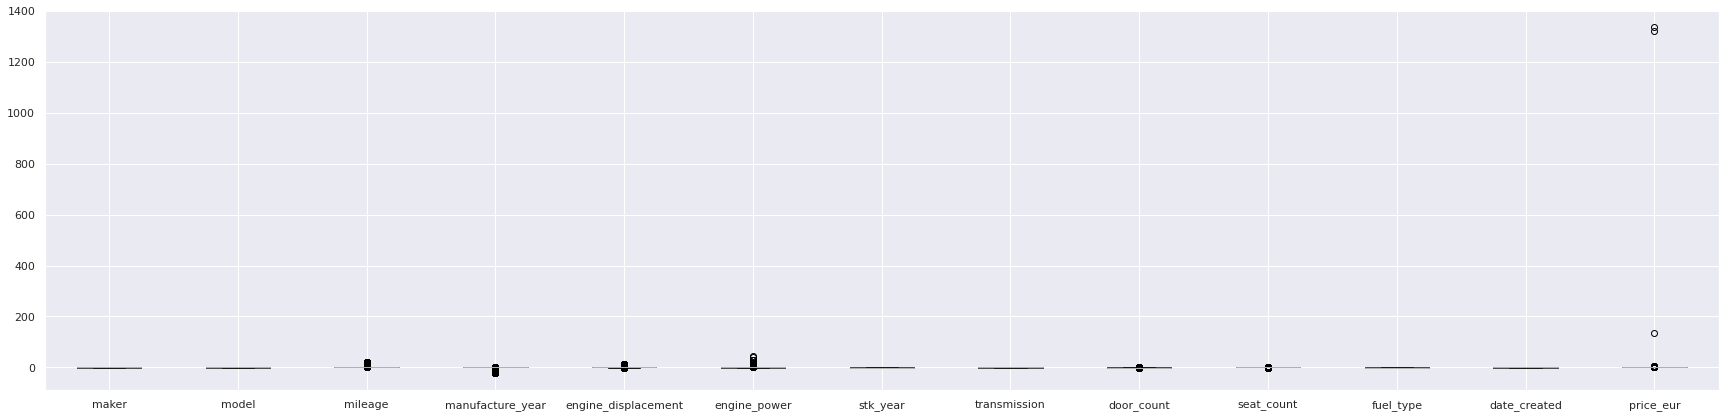

In [0]:
plt.figure(figsize=(30,7))
df.boxplot() 

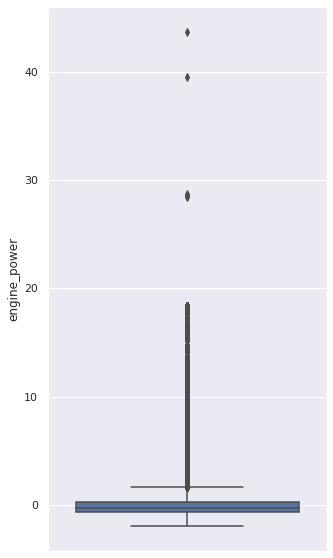

In [0]:

sns.set(rc={'figure.figsize':(5, 10)})
sns.boxplot(y=df.engine_power)

### Correlation Plot

Since, almost all the steps of the data preprocessing are performed, we have a complete set of numeric, scales and feature extracted dataset. Now, we will see the correlation plot and decide in case we can drop any of the columns.

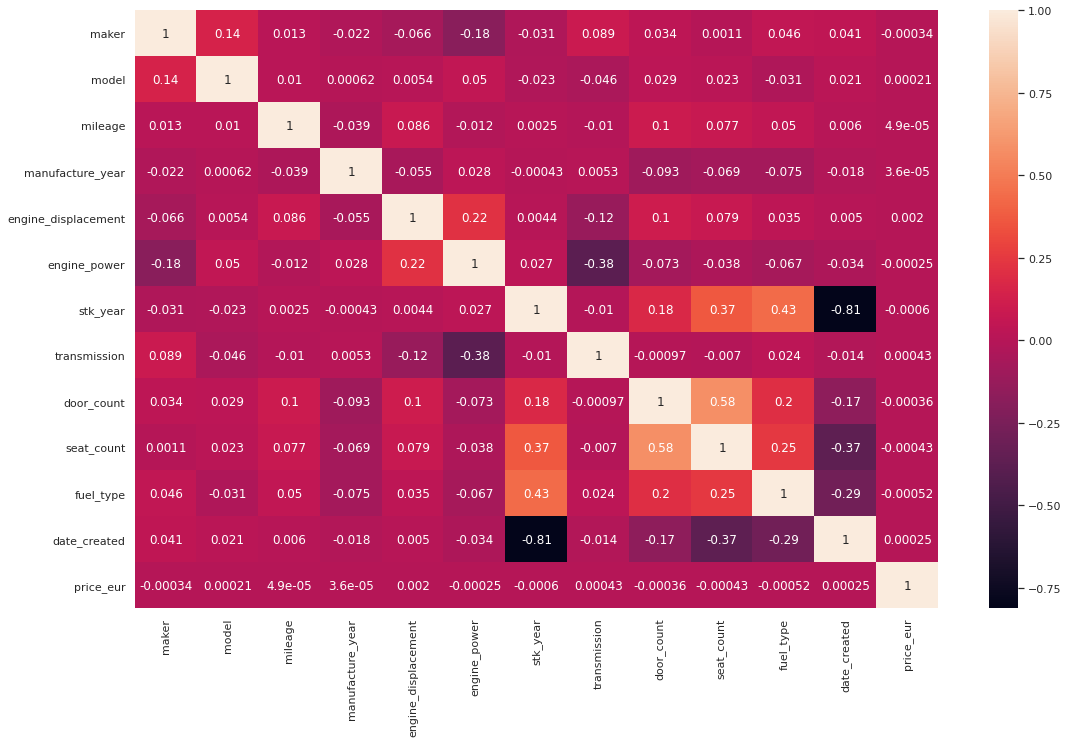

In [0]:

sns.set(rc={'figure.figsize':(18,11)})
sns.heatmap(df.corr(), annot = True)


### Splitting the data into inputs and labels

In [0]:
X = df.iloc[:, :-1]
X.shape

(3552912, 12)

In [0]:
y = df.iloc[:, -1]

In [0]:
len(y)

3552912

### Splitting the dataset into train test and validation set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Building Linear REgression Model

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression().fit(X_train, y_train)

In [0]:
reg.coef_

array([-5.95908557e-04,  4.58316911e-04, -9.72029764e-05,  1.23186284e-04,
        3.46965892e-03, -1.02897314e-03, -1.28469099e-03,  8.08385125e-04,
       -5.72032756e-04, -3.73648490e-04, -4.21222493e-04, -1.06488209e-03])

In [0]:
reg.intercept_

0.00033149425202730847

In [0]:
y_pred = reg.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.015551815198106937